<a href="https://colab.research.google.com/github/arminarj/convex-optimization-boyd/blob/master/Minimum%20fuel%20optimal%20control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Minimum fuel optimal control.

CVXPY



In [0]:
import cvxpy as cp
import numpy as np

In [151]:
n=3; # state dimension
N=30; # time horizon
A=np.array([[-1, 0.4, 0.8], [1, 0, 0], [0, 1, 0]])
b=np.array([1, 0, 0.3]).reshape(3, 1)

x0 = np.zeros((n,1)).squeeze()
xdes = np.array([7, 2, -6])

X = cp.Variable((n,N+1))
u = cp.Variable((1,N))

# DCP problems.
obj = cp.Minimize(cp.sum(cp.maximum(cp.abs(u), 2 * cp.abs(u)-1))) # sum(max(abs(u),2*abs(u)-1))

constraints =  [X[:,1:N+1] == A@X[:,:N]+b@u,
                X[:,0] == x0,
                X[:,N] == xdes]

prob = cp.Problem(obj, constraints)

print("prob is DCP:", prob.is_dcp())

try:
    prob.solve()
except Exception as e:
    print(e)
print("status:", prob.status)
print("optimal value", prob.value)
# print("optimal var", X.value, u.value)

prob is DCP: True
status: optimal
optimal value 17.323567851898527


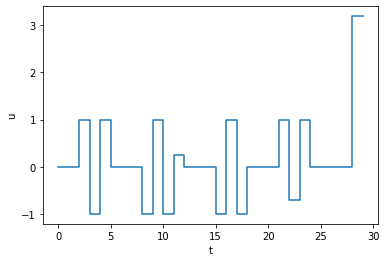

In [152]:
import matplotlib.pyplot as plt

t = np.array(range(N))
u_plt = u.value
plt.step(t, u_plt[0,:])
plt.xlabel("t")
plt.ylabel("u")
plt.show()

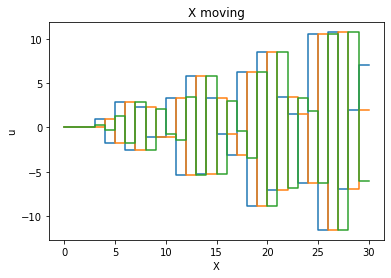

In [160]:
# import matplotlib.pyplot as plt

t = np.array(range(N+1))
plt.figure()
for i in range(3):
    plt.step(t, X.value[i, :])
plt.title('X moving')
plt.xlabel(f"X")
plt.ylabel("u")
plt.show()